# Double Pendulum Simulation

![](Resources/Double_Pendulum.png)

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from DoublePendulum import DoublePendulum, eq1, eq2, eq3, eq4

We derived the equations of motion from first principles in `Derivation.ipynb`

Thanks to [diego.assencio](https://diego.assencio.com/?index=1500c66ae7ab27bb0106467c68feebc6#mjx-eqn-post_1500c66ae7ab27bb0106467c68feebc6_first_order_eq_theta_omega)

In [2]:
LHS = sp.Matrix([[eq1.lhs], [eq2.lhs], [eq3.lhs], [eq4.lhs]])
RHS = sp.Matrix([[eq1.rhs], [eq2.rhs], [eq3.rhs], [eq4.rhs]])
MAT_EQ = sp.Eq(LHS, RHS)
display(MAT_EQ)

Eq(Matrix([
[               omega1(t)],
[               omega2(t)],
[Derivative(omega1(t), t)],
[Derivative(omega2(t), t)]]), Matrix([
[                                                                                                                                                                                                                                                             Derivative(theta1(t), t)],
[                                                                                                                                                                                                                                                             Derivative(theta2(t), t)],
[           (g*m1*sin(theta1(t)) + g*m2*sin(theta1(t) - 2*theta2(t))/2 + g*m2*sin(theta1(t))/2 + l1*m2*sin(2*theta1(t) - 2*theta2(t))*Derivative(theta1(t), t)**2/2 + l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2)/(l1*(-m1 + m2*cos(theta1(t) - theta2(t))**2 - m2))],
[((m1 + m2)*(g*sin(the

----
&nbsp;
## Double Pendulums

- The `init_values` array specifies the starting angles and angular velocities of the two pendulum arms in degrees. 
- The `time` array defines the simulation's start and end times and the number of points to compute `[start, end, points]`

----
&nbsp;
#### Set default unity parameters such that, 

$$m_1=m_2=1\text{kg}$$
$$l_1=l_2=1\text{m}$$

In [3]:
l1, l2, m1, m2, g = sp.symbols("l1, l2, m1, m2 g", positive=True, real=True)

# Define parameters
params = {
    m1: 1,    # mass1
    m2: 1,    # mass2
    l1: 1,    # length1
    l2: 1,    # length2
    g : 9.81  # acceleration due to gravity
}

----
&nbsp;
### Periodic/Quasi-periodic


Pendulum 1, $\theta_2 = 45 \degree$

- Resembles normal mode motion, albeit slightly out of phase
- Phase path is a [Lissajous curve](https://en.wikipedia.org/wiki/Lissajous_curve#:~:text=A%20Lissajous%20curve%20%2Fˈl,end%20of%20a%20Blackburn%20pendulum)

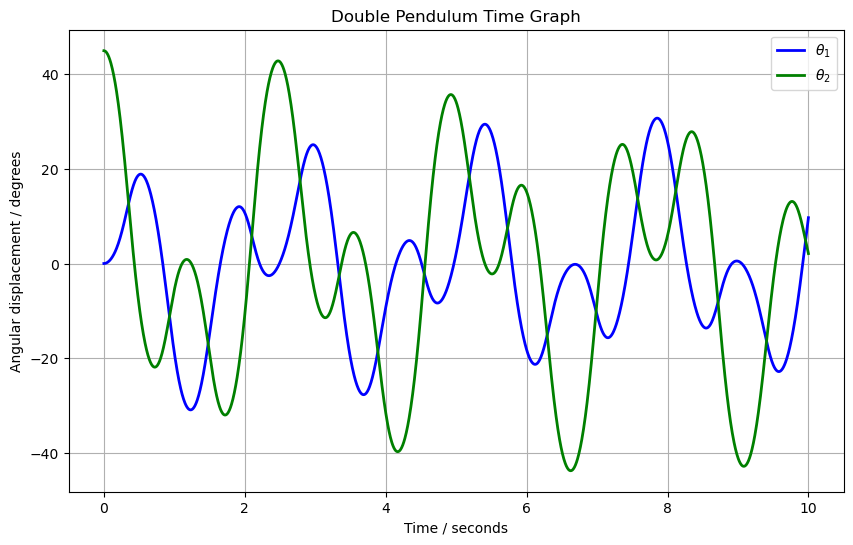

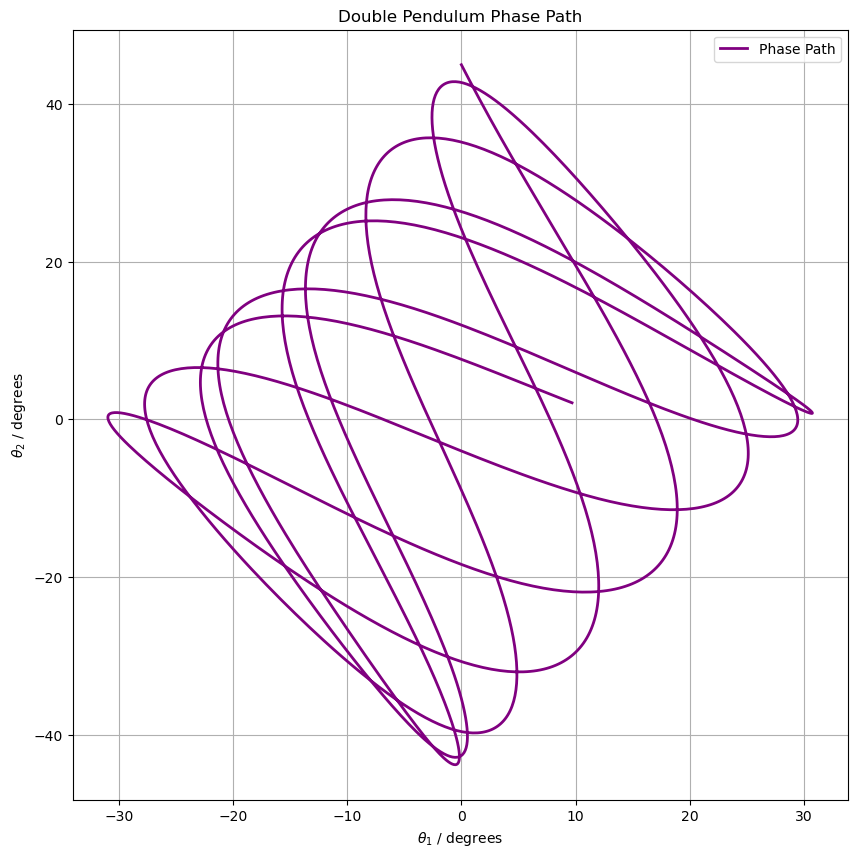

In [4]:
init_values = [0, 45, 0, 0]
time = [0, 10, 2000]
pendulum1 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum1.time_graph()
pendulum1.phase_path()

Calling `fig.show()` produces the below animation

In [5]:
pendulum1.precompute_positions()  # Precompute before the animation
fig = pendulum1.animate_pendulum(trace=True, appearance='dark')
fig.show()

![img](Resources/Images/Pend1.png)

Pendulum 2, $\theta_1 = 45 \degree$, $\theta_2 = 45 \degree$

- Phase path is quasi-periodic
- $\theta_2$ shows a lag/jerk in time graph

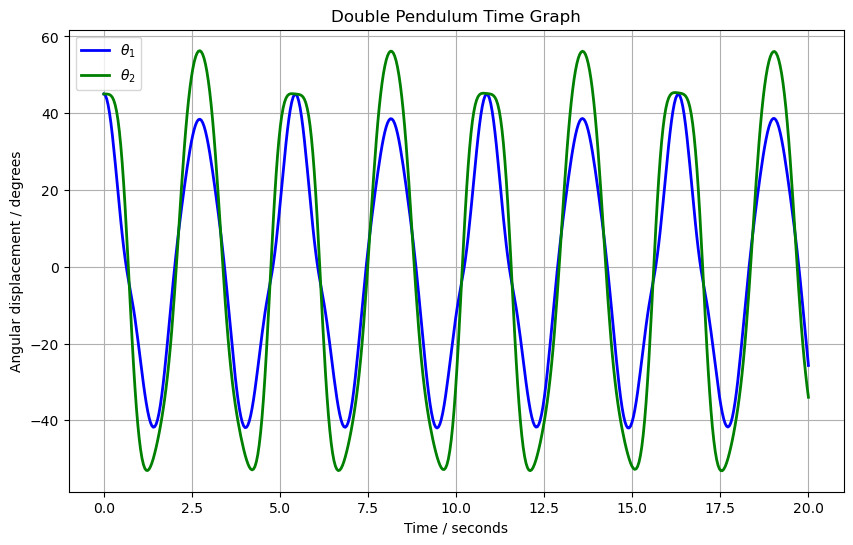

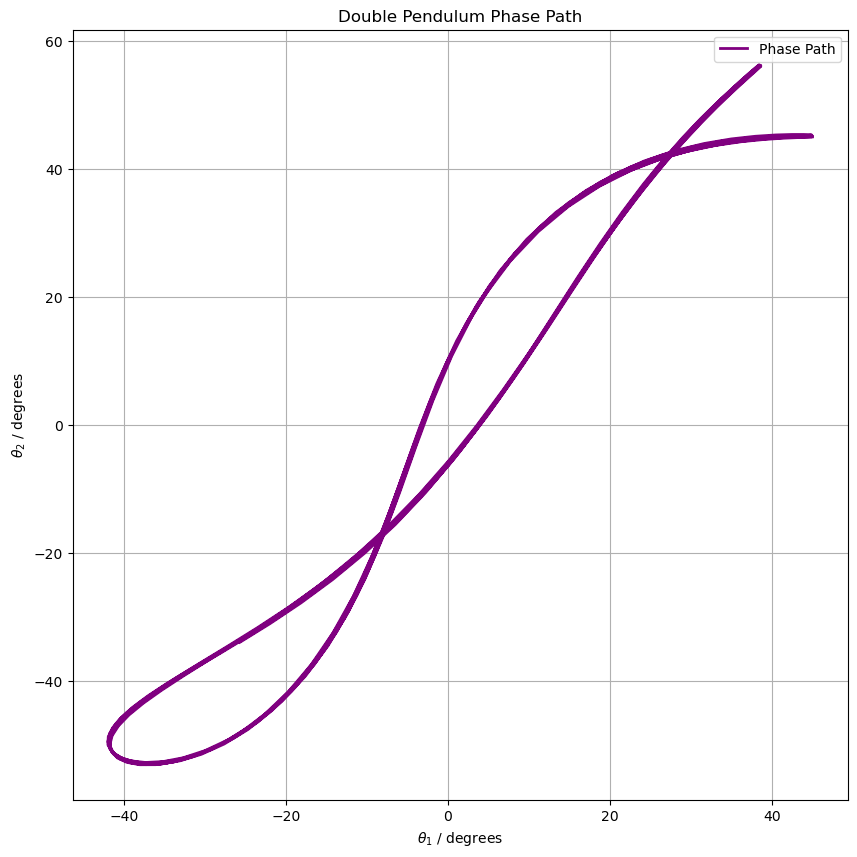

In [6]:
init_values = [45, 45, 0, 0]
time = [0, 20, 500]
pendulum2 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum2.time_graph()
pendulum2.phase_path()

In [7]:
pendulum2.precompute_positions()  # Precompute before the animation
fig = pendulum2.animate_pendulum(trace=True, appearance='dark')
#fig.show()

![img](Resources/Images/Pend2.png)

Pendulum 3, $\theta_1 = 30 \degree$, $\theta_2 = 45 \degree$

- Even large initial angles can see periodic motion

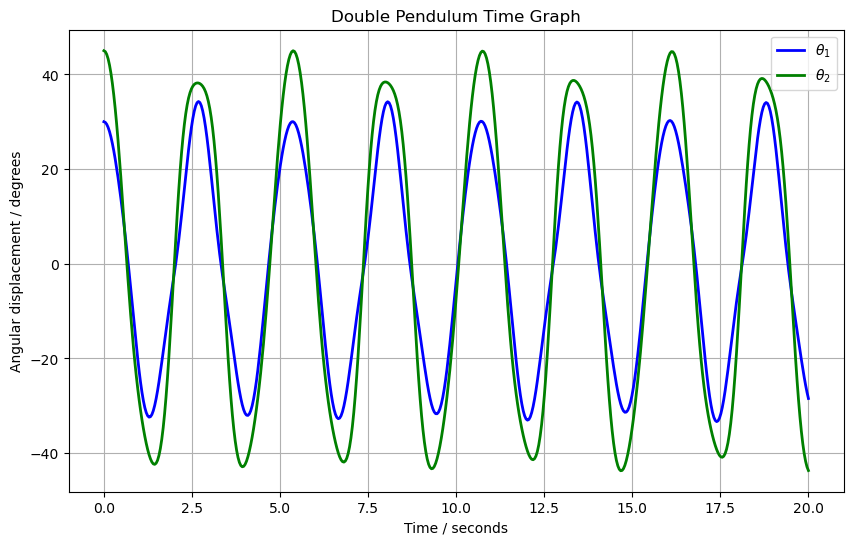

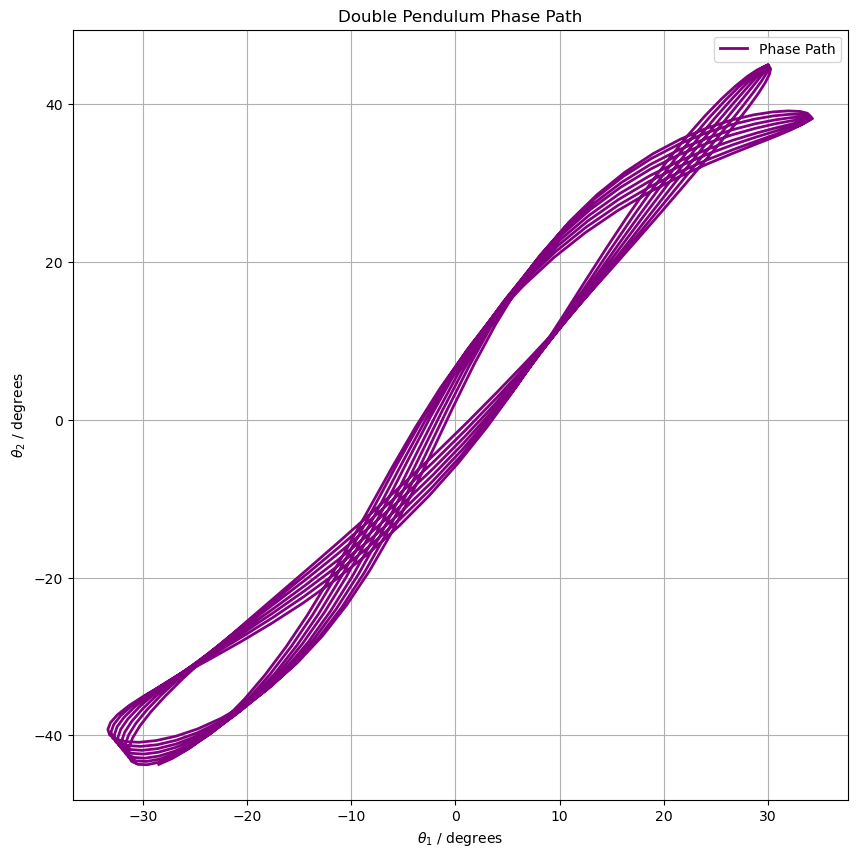

In [8]:
init_values = [30, 45, 0, 0]
time = [0, 20, 500]
pendulum3 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum3.time_graph()
pendulum3.phase_path()

In [9]:
pendulum3.precompute_positions()  # Precompute before the animation
fig = pendulum3.animate_pendulum(trace=True, appearance='dark')
#fig.show()

![img](Resources/Images/Pend3.png)

----
&nbsp;
### Chaotic to Quasi-periodic - $1 \degree$ difference

Pendulum 4, $\theta_1 = 60 \degree$, $\theta_2 = 90 \degree$

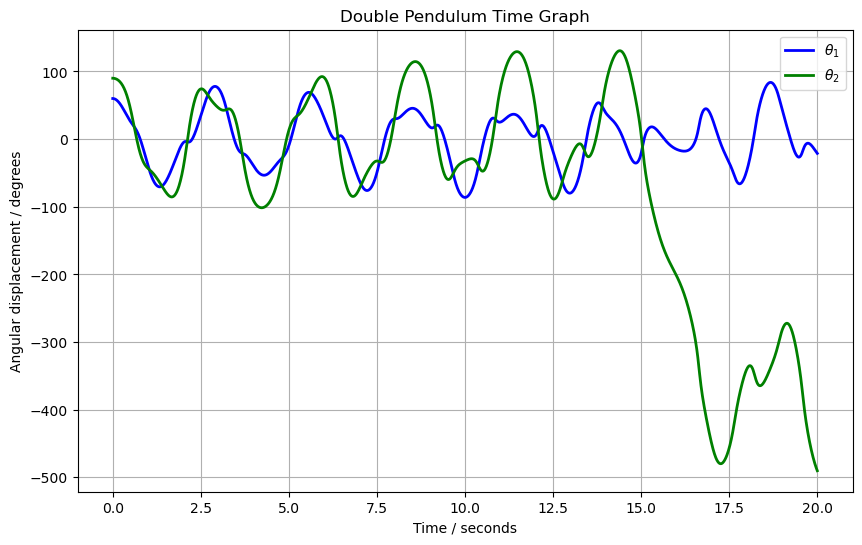

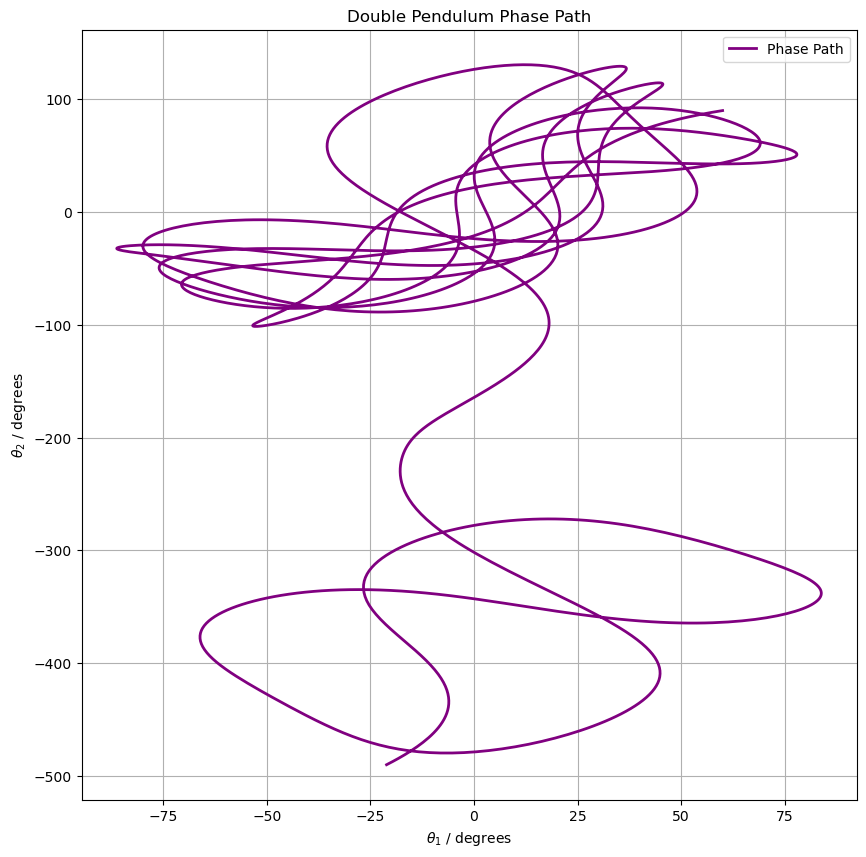

In [10]:
init_values = [60, 90, 0, 0]
time = [0, 20, 2000]
pendulum4 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum4.time_graph()
pendulum4.phase_path()

In [11]:
pendulum4.precompute_positions()  # Precompute before the animation
fig = pendulum4.animate_pendulum(trace=True, appearance='dark')
#fig.show()

![img](Resources/Images/Pend4.png)

#### $\theta_1$ is set $1 \degree$ above the above pendulum...

Pendulum 5, $\theta_1 = 60 \degree$, $\theta_2 = 91 \degree$

- Motion again becomes quasi-periodic

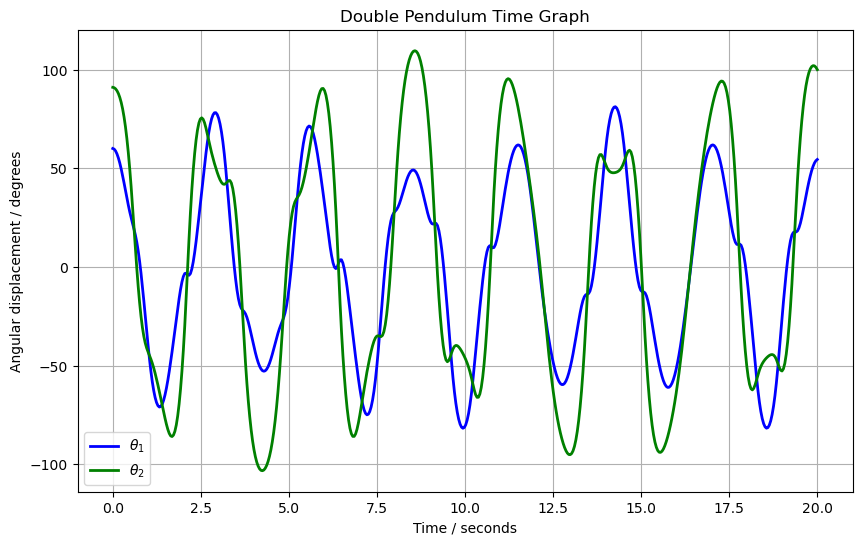

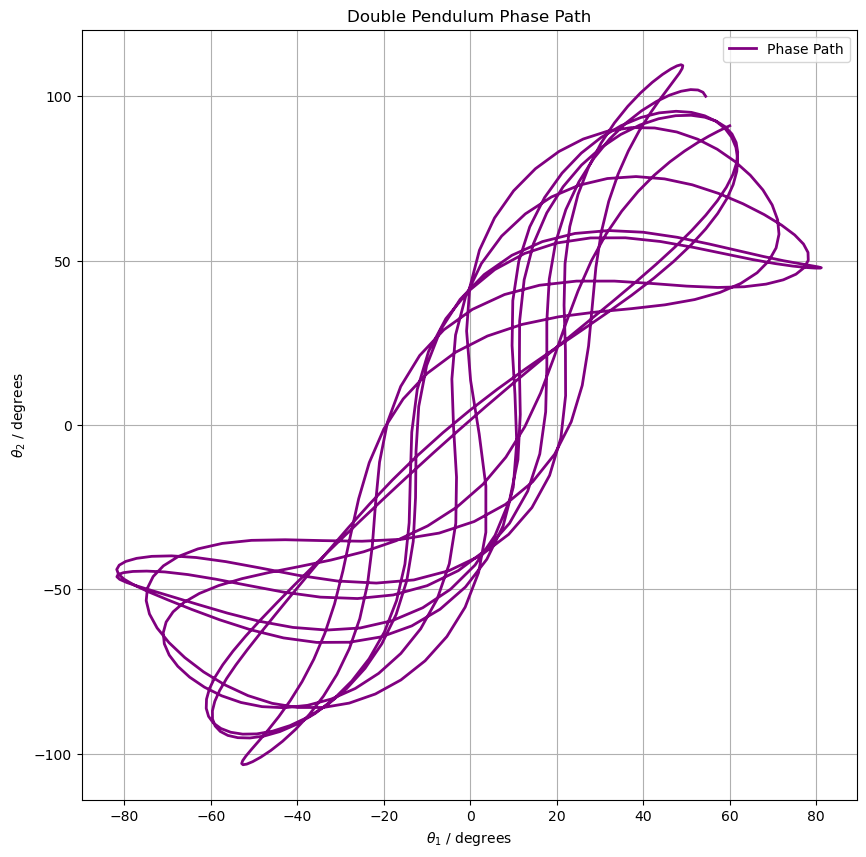

In [12]:
init_values = [60, 91, 0, 0]
time = [0, 20, 500]
pendulum5 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum5.time_graph()
pendulum5.phase_path()

In [13]:
pendulum5.precompute_positions()  # Precompute before the animation
fig = pendulum5.animate_pendulum(trace=True, appearance='dark')
#fig.show()

![img](Resources/Images/Pend5.png)

----
&nbsp;
## Chaotic

#### Need a good working definition and quantifiable conditions for... Just trying random-ish initial conditions currently!

Pendulum 6, $\theta_1 = -105 \degree$, $\theta_2 = 105 \degree$

- Phase portrait is all over the place

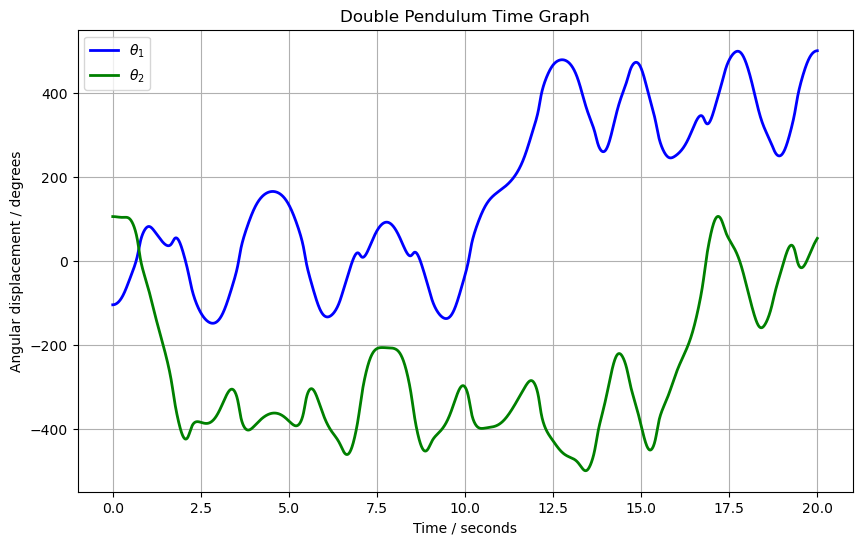

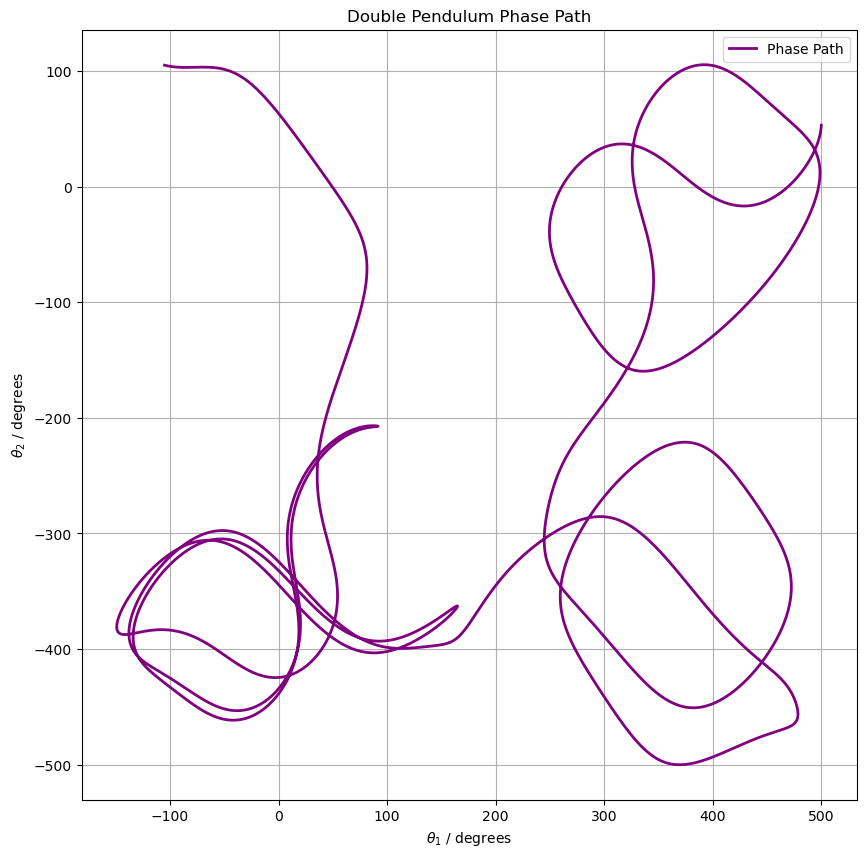

In [14]:
init_values = [-105, 105, 0, 0]
time = [0, 20, 4000]
pendulum6 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum6.time_graph()
pendulum6.phase_path()

In [15]:
pendulum6.precompute_positions()  # Precompute before the animation
fig = pendulum6.animate_pendulum(trace=True, appearance='dark')
#fig.show()

![img](Resources/Images/Pend6.png)

Pendulum 7, $\theta_1 = -80 \degree$, $\theta_2 = 105 \degree$, $\omega_1 = 15 \degree \text{s}^{-1}$ $\omega_2 = -15 \degree \text{s}^{-1}$

- Phase portrait is all over the place

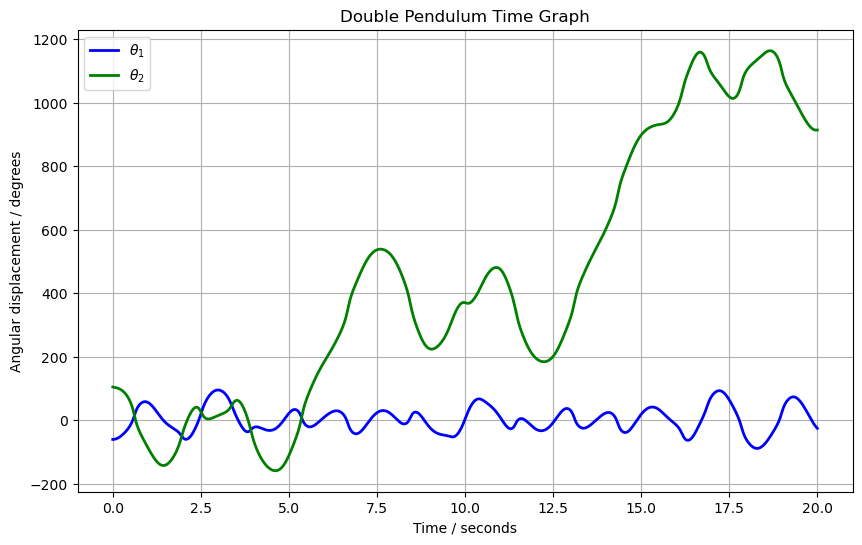

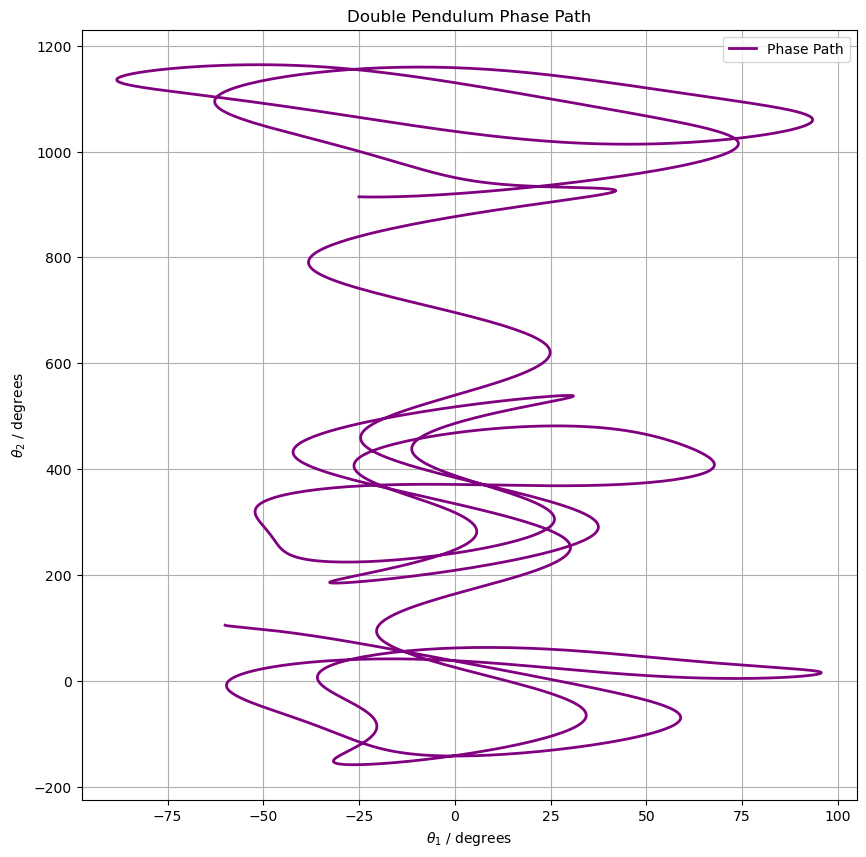

In [16]:
init_values = [-60, 105, 0, -15]
time = [0, 20, 2000]
pendulum7 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum7.time_graph()
pendulum7.phase_path()

In [17]:
pendulum7.precompute_positions()  # Precompute before the animation
fig = pendulum7.animate_pendulum(trace=True, appearance='dark')
#fig.show()

![img](Resources/Images/Pend7.png)

----
&nbsp;
## Interesting Normal Mode - Large initial $\theta_2$

Pendulum 8, $\theta_2 = 120 \degree$

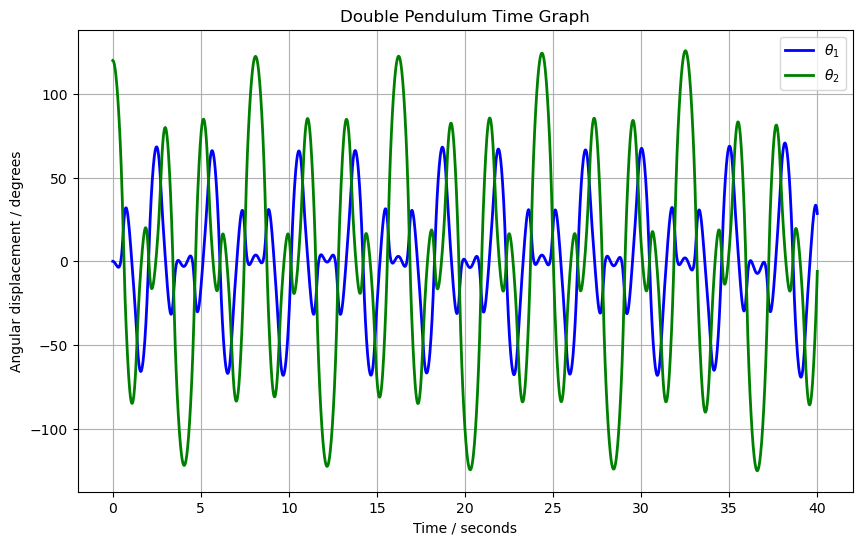

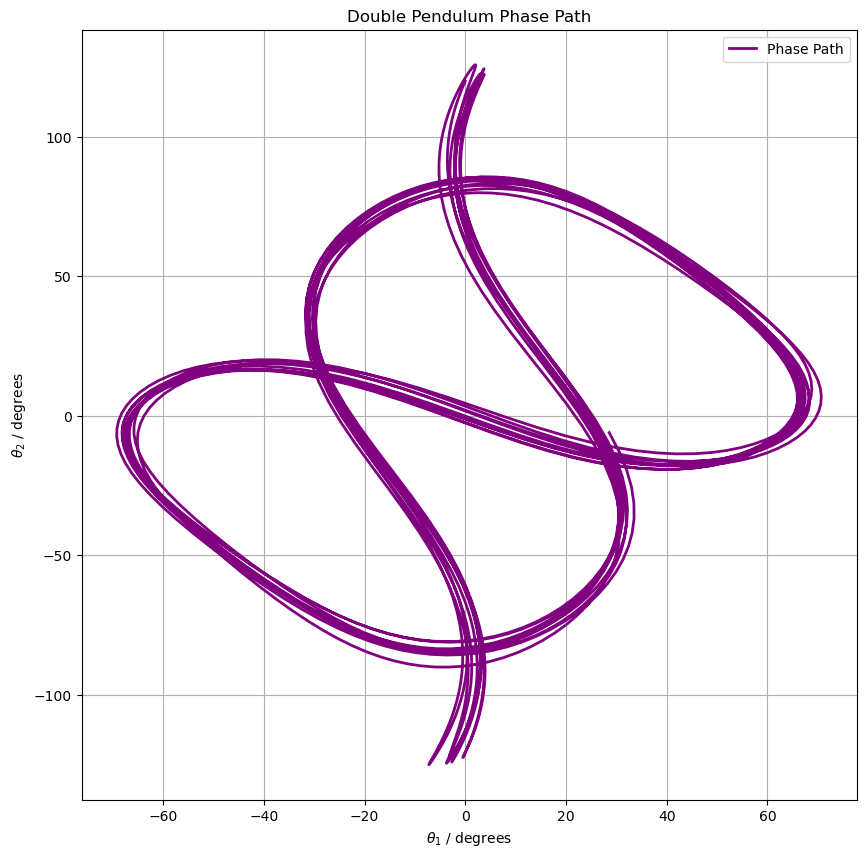

In [6]:
init_values = [0, 120, 0, 0]
time = [0, 40, 2000]
pendulum8 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum8.time_graph()
pendulum8.phase_path()

In [19]:
pendulum8.precompute_positions()  # Precompute before the animation
fig = pendulum8.animate_pendulum(trace=True, appearance='dark')
#fig.show()

![img](Resources/Images/Pend8.png)

----
&nbsp;
## Examples with non-zero angular velocity

#### I found the below examples on [Wolfram Alpha](https://demonstrations.wolfram.com/DoublePendulum/)

Pendulum 9

- $P1$: $\omega_1 \approx 3\pi/2$ CW
- $P2$: $\omega_2 \approx \pi$ CW
- $m_1=7.5m_2$

In [20]:
# Define parameters
params = {
    m1: 7.5,    # mass1
    m2: 1,      # mass2
    l1: 1.74,   # length1
    l2: 2.35,   # length2
    g : 9.8     # acceleration due to gravity
}

In [21]:
theta_1 = -1.60221
omega_1 = -8.3
omega_2 = -6.4

init_values = [theta_1, 0, omega_1, omega_2]

# Convert to degrees and update in place
for i in range(len(init_values)):
    init_values[i] = np.rad2deg(init_values[i])

# Updated init_values in degrees
print("initial conditions in degrees:", init_values)

initial conditions in degrees: [-91.79987089365562, 0.0, -475.55496995858334, -366.6929888837269]


In [22]:
time = [0, 20, 2000]
pendulum9 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)

In [23]:
pendulum9.precompute_positions()  # Precompute before the animation
fig = pendulum9.animate_pendulum(trace=True, appearance='dark')
#fig.show()

![img](Resources/Images/Pend9.png)

Pendulum 10

- Pendulum 1: CCW $\omega$
- Pendulum 2: CW $\omega$
- $m_1=3m_2$
- $l_2=1.5l_1$

Looks like a spirograph!

In [24]:
# Define parameters
params = {
    m1: 3,    # mass1
    m2: 1,    # mass2
    l1: 1,    # length1
    l2: 1.5,    # length2
    g : 9.8  # acceleration due to gravity
}

In [25]:
theta_1 = np.pi/2
omega_1 = 10
omega_2 = -8

init_values = [theta_1, 0, omega_1, omega_2]

# Convert to degrees and update in place
for i in range(len(init_values)):
    init_values[i] = np.rad2deg(init_values[i])

# Updated init_values in degrees
print("initial conditions in degrees:", init_values)

initial conditions in degrees: [90.0, 0.0, 572.9577951308232, -458.3662361046586]


In [26]:
time = [0, 20, 4000]
pendulum10 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)

In [27]:
pendulum10.precompute_positions()  # Precompute before the animation
fig = pendulum10.animate_pendulum(trace=True, appearance='dark')
#fig.show()

![img](Resources/Images/Pend10.png)

----